## Imports

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
from data_processing import *

In [39]:
df, clustering_dict = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv')

Amount of invalid data: 2


In [40]:
df = get_numeric_name(df, "Nazwa przystanku", drop=True)
df['Przystanek'] = df['Numeryczna Nazwa przystanku'] * 100 + df['Numer przystanku']

In [41]:
# features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Przystanek', 'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.', 'Opóźnienie w minutach']
features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

In [42]:
df.sample(3)

,Nr linii,Wariant linii,Kurs,Oznaczenie brygady,Numer taborowy,Numer przystanku,Rzeczywisty czas odjazdu,Rozkładowy czas odjazdu,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział,Opóźnienie w minutach,class,Numeryczna Nazwa przystanku,Przystanek
14462,123,TP-DWL,2022-01-30 06:09:00,3,9417,1,2022-01-30 06:19:00,2022-01-30 06:18:00,2,0,0,2,6.300000,25,1,0,544,54401
152317,719,TP-JAN,2022-01-30 17:14:00,1,9801,1,2022-01-30 17:48:00,2022-01-30 17:47:00,17,0,0,17,17.783333,71,1,1,719,71901
15139,123,TP-DWL,2022-01-30 08:52:00,4,9438,7,2022-01-30 08:55:00,2022-01-30 08:55:00,4,0,2,6,8.916667,35,0,0,786,78607


## Classification

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from mlxtend.evaluate import bootstrap_point632_score
from mlxtend.evaluate import BootstrapOutOfBag
from mlxtend.evaluate import bootstrap

import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
X_train, X_test, y_train, y_test = get_train_and_test_by_lines(df, features, class_labels)

### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [46]:
model = DecisionTreeClassifier(max_depth = 1000, random_state = 1)

In [47]:
#LeaveOneOut CrossValidation with negative mean absolute scores: the higher the scores, the lower mean absolute errors
# scores1 = cross_validate(model, X_train, y_train, cv = LeaveOneOut(), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
# err1 = accuracy_score(scores1['estimator'][scores1['test_score'].argmax()].predict(X_test),y_test)

In [48]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, return_estimator = True)
err2 = accuracy_score(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test),y_test)

In [49]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), return_estimator = True)
err3 = accuracy_score(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test),y_test)

In [50]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, return_estimator = True)
err4 = accuracy_score(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test), y_test)

In [51]:
print("------- Accuracy --------")
# print(f"1. Accuracy LeaveOneOut {err1}")
print(f"2. Accuracy BootstrapOutOfBag {err2}")
print(f"3. Accuracy RepeatedKFold {err3}")
print(f"4. Accuracy KFold {err4}")

------- Accuracy --------
2. Accuracy BootstrapOutOfBag 0.7811481574329406
3. Accuracy RepeatedKFold 0.8119829531210829
4. Accuracy KFold 0.8047129606417649


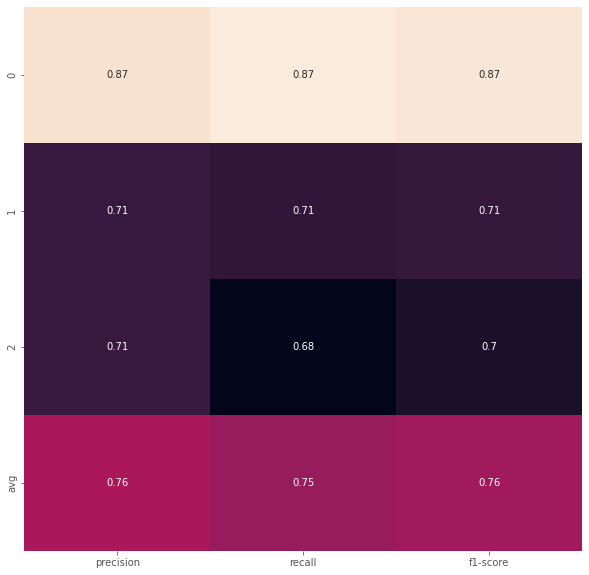

In [52]:
predicted = scores3['estimator'][scores3['test_score'].argmax()].predict(X_test)
plot_classification_report(y_test, predicted)

### RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(max_depth = 1000, random_state = 1)

In [55]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, return_estimator = True)
err2 = accuracy_score(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test),y_test)

In [56]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), return_estimator = True)
err3 = accuracy_score(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test),y_test)

In [57]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, return_estimator = True)
err4 = accuracy_score(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test), y_test)

In [58]:
print("------- Accuracy --------")
# print(f"1. Accuracy LeaveOneOut {err1}")
print(f"2. Accuracy BootstrapOutOfBag {err2}")
print(f"3. Accuracy RepeatedKFold {err3}")
print(f"4. Accuracy KFold {err4}")

------- Accuracy --------
2. Accuracy BootstrapOutOfBag 0.8287791426422663
3. Accuracy RepeatedKFold 0.8450739533717724
4. Accuracy KFold 0.8440711957884182


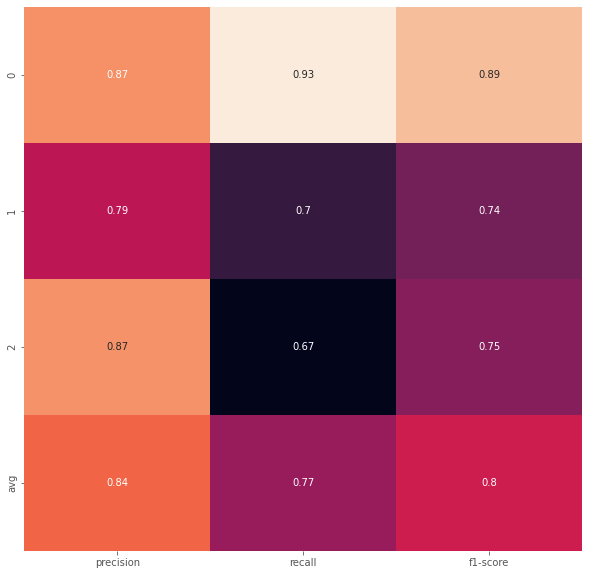

In [61]:
predicted = scores4['estimator'][scores4['test_score'].argmax()].predict(X_test)
plot_classification_report(y_test, predicted)

### RUSBoostClassifier

In [62]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [65]:
rusboost = RUSBoostClassifier(n_estimators=50, base_estimator = DecisionTreeClassifier(max_depth = 1000, random_state = 1), algorithm='SAMME', random_state=1)
rusboost.fit(X_train, y_train)
predicted = rusboost.predict(X_test)
print("Resampled accuracy: {:.2f}".format(accuracy_score(y_test, predicted)))
print("Resampled balanced accuracy: {:.2f}".format(balanced_accuracy_score(y_test, predicted)))

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled accuracy: 0.69
Resampled balanced accuracy: 0.74


C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


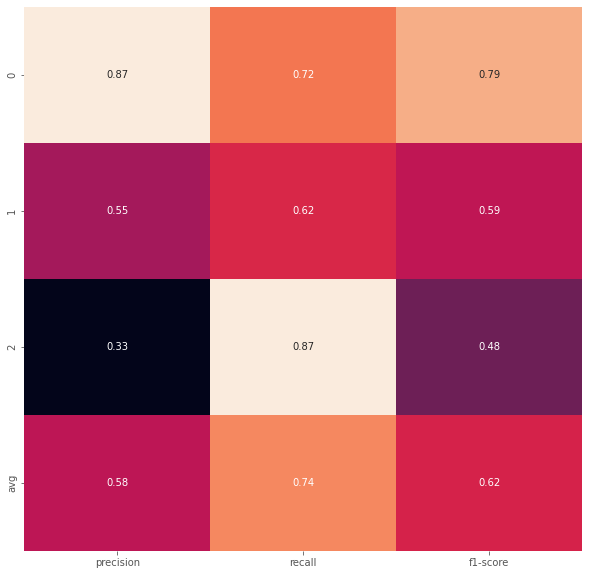

In [66]:
plot_classification_report(y_test, predicted)

In [67]:
rusboost = RUSBoostClassifier(n_estimators=50, base_estimator = RandomForestClassifier(max_depth = 1000, random_state = 1), algorithm='SAMME', random_state=1)
rusboost.fit(X_train, y_train)
predicted = rusboost.predict(X_test)
print("Resampled accuracy: {:.2f}".format(accuracy_score(y_test, predicted)))
print("Resampled balanced accuracy: {:.2f}".format(balanced_accuracy_score(y_test, predicted)))

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


Resampled accuracy: 0.69
Resampled balanced accuracy: 0.73


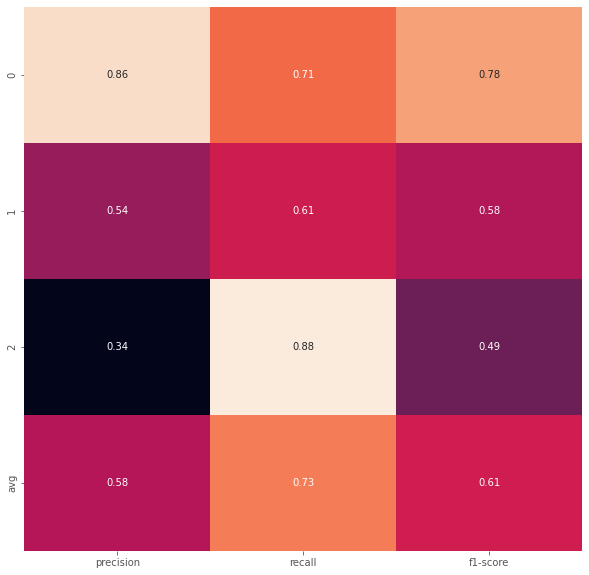

In [68]:
plot_classification_report(y_test, predicted)

## Regresja

In [69]:
X_train, X_test, y_train, y_test = get_train_and_test_by_lines(df, features, regress_labels)

### DecisionTreeRegressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
model = DecisionTreeRegressor(max_depth = 1000, random_state = 1)

In [73]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
err2 = abs(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [74]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 10), scoring = 'neg_mean_absolute_error', return_estimator = True)
err3 = abs(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [75]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, scoring = 'neg_mean_absolute_error',return_estimator = True)
err4 = abs(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [76]:
d_err = []
d_err = pd.DataFrame({'Err':err2.reshape(-1), 'Type': 'BootOOB'})
d_err = d_err.append(pd.DataFrame({'Err':err3.reshape(-1), 'Type': 'Repeated KFold'}),ignore_index=True)
d_err = d_err.append(pd.DataFrame({'Err':err4.reshape(-1), 'Type': 'KFold'}),ignore_index=True)

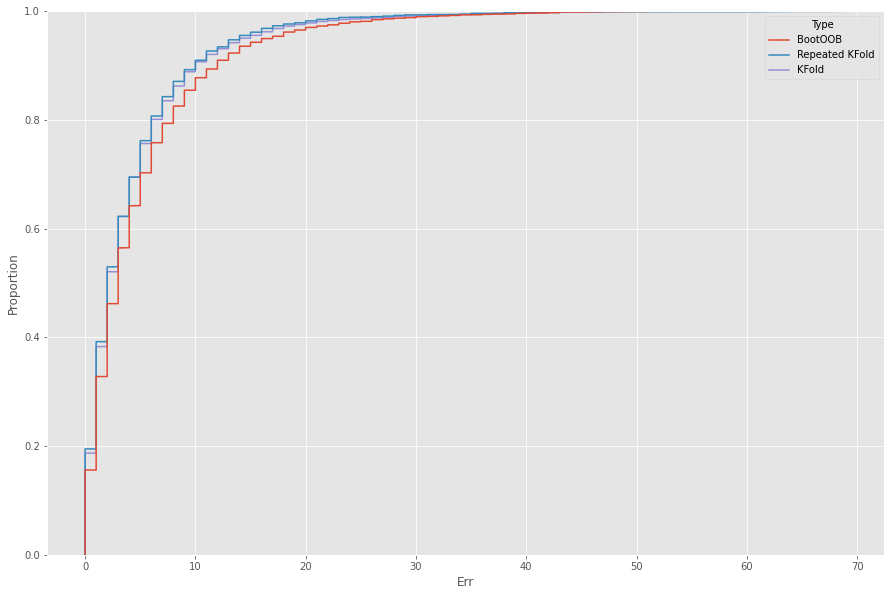

In [77]:
plt.figure(figsize = (15,10))
g = sns.ecdfplot(d_err, x = "Err", hue = 'Type')
#g.set(xlim = (0, 10))

In [78]:
stats = d_err.groupby('Type').describe().round(2)
stats

Err                                      
                 count  mean   std  min  25%  50%  75%   max
Type                                                        
BootOOB         3989.0  4.88  6.18  0.0  1.0  3.0  6.0  61.0
KFold           3989.0  4.18  5.67  0.0  1.0  2.0  5.0  69.0
Repeated KFold  3989.0  4.05  5.46  0.0  1.0  2.0  5.0  68.0

Accuracy: 0.81123


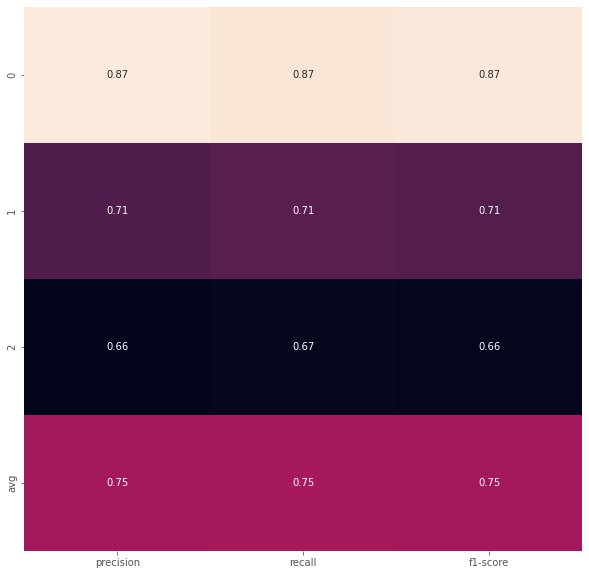

In [83]:
prediceted = scores4['estimator'][scores4['test_score'].argmax()].predict(X_test)
accuracy_of_regression(y_test.to_numpy().reshape(1,-1)[0], np.floor(prediceted), clustering_dict)

### RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
model = RandomForestRegressor(max_depth = 1000, random_state = 1)

In [86]:
#Bootstrap Out of Bag
scores2 = cross_validate(model, X_train, y_train, cv = BootstrapOutOfBag(n_splits=5, random_seed=456), n_jobs = -1, scoring = 'neg_mean_absolute_error', return_estimator = True)
err2 = abs(scores2['estimator'][scores2['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [87]:
#Repeated K-Fold
scores3 = cross_validate(model, X_train, y_train, n_jobs = -1, cv = RepeatedKFold(n_splits = 10, n_repeats = 2), scoring = 'neg_mean_absolute_error', return_estimator = True)
err3 = abs(scores3['estimator'][scores3['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [88]:
#K-Fold
scores4 = cross_validate(model, X_train, y_train, cv = KFold(10), n_jobs=-1, scoring = 'neg_mean_absolute_error',return_estimator = True)
err4 = abs(scores4['estimator'][scores4['test_score'].argmax()].predict(X_test) - y_test.to_numpy().reshape(1, -1))

In [89]:
d_err = []
d_err = pd.DataFrame({'Err':err2.reshape(-1), 'Type': 'BootOOB'})
d_err = d_err.append(pd.DataFrame({'Err':err3.reshape(-1), 'Type': 'Repeated KFold'}),ignore_index=True)
d_err = d_err.append(pd.DataFrame({'Err':err4.reshape(-1), 'Type': 'KFold'}),ignore_index=True)

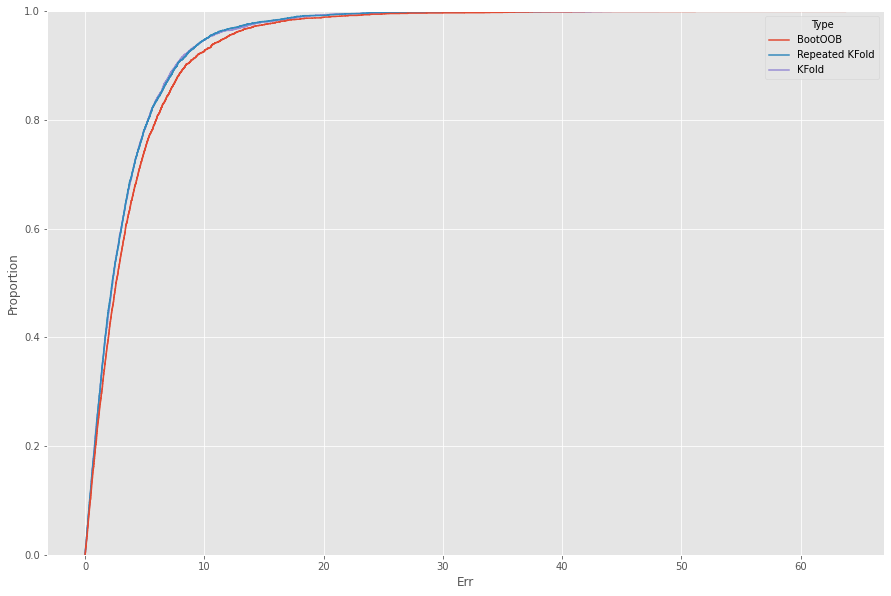

In [90]:
plt.figure(figsize = (15,10))
g = sns.ecdfplot(d_err, x = "Err", hue = 'Type')
#g.set(xlim = (0, 10))

In [91]:
stats = d_err.groupby('Type').describe().round(2)
stats

Err                                          
                 count  mean   std  min   25%   50%   75%    max
Type                                                            
BootOOB         3989.0  3.86  4.34  0.0  1.12  2.60  5.07  63.80
KFold           3989.0  3.44  3.87  0.0  0.99  2.31  4.51  48.14
Repeated KFold  3989.0  3.42  3.77  0.0  1.01  2.27  4.54  42.41

Accuracy: 0.83304


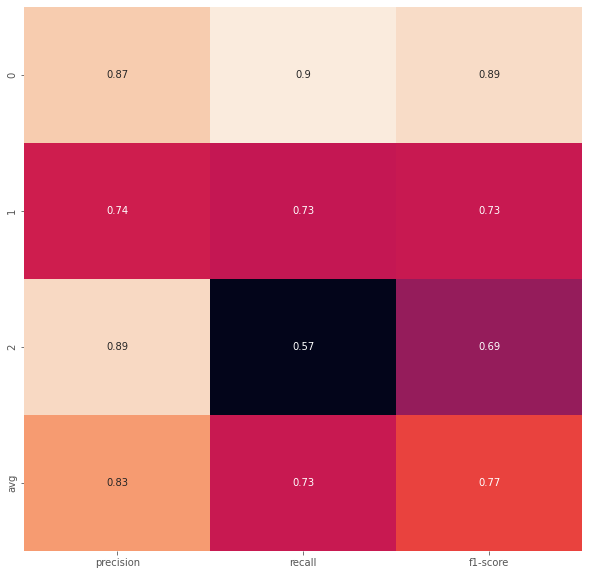

In [92]:
prediceted = scores4['estimator'][scores4['test_score'].argmax()].predict(X_test)
accuracy_of_regression(y_test.to_numpy().reshape(1,-1)[0], np.floor(prediceted), clustering_dict)